In [35]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def concat_df(csv_list):
    df = pd.DataFrame()
    for path in csv_list:
        df_aux = pd.read_csv(path)
        df = pd.concat([df, df_aux], ignore_index=True)
    return df

In [47]:
def rename_element(element):
    try:
        aux = element.split(".")
        return aux[1]
    except:
        return element

In [48]:
main_dir = '/home/cagui/Documents/experimentos_pesquisa/Resultados'
pastas = os.listdir(main_dir)
datasets = pastas
df_dict = dict()

for dataset in pastas:
    csvs = os.listdir(os.path.join(main_dir, dataset))
    caminho_aux1 = os.path.join(main_dir, dataset)
    caminho = [os.path.join(caminho_aux1, csv) for csv in csvs]
    df = concat_df(caminho)
    df_dict[dataset] = df

In [49]:
# refazendo a coluna de algoritmos

for dataframe in df_dict:
    if len(df_dict[dataframe]) != 0:
        df_dict[dataframe]['Algoritmo'] = df_dict[dataframe]['Algoritmo'].apply(rename_element)

In [50]:
df_dict['citeseer']['Algoritmo'].unique()

array(['MCLS', 'AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3', 'GAE_PUL4',
       'RCSVM_RN', 'PU_LP', 'CCRNE', 'LP_PUL'], dtype=object)

In [51]:
datasets = os.listdir('/home/cagui/Documents/experimentos_pesquisa/Resultados')
algoritmos = df_dict['citeseer']['Algoritmo'].unique()
rates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25]

In [52]:
df_algoritmos = list()
df_rate = list()
df_acc = list()
df_acc_std = list()
df_f1 = list()
df_f1_std = list()
df_dataset = list()


for dataframe in df_dict:
    for rate in rates:
        for algorithm in algoritmos:
            try:
                # fazer o slice para cada rate e pra cada dataset, criar um dicionario pra armazenar e transformar em df
                slice = df_dict[dataframe][(df_dict[dataframe]['Algoritmo'] == algorithm) & (df_dict[dataframe]['Rate'] == rate)]
                df_algoritmos.append(slice.iloc[0,0])
                df_rate.append(rate)
                df_acc.append(slice['acc'].mean())
                df_acc_std.append(slice['acc'].std())
                df_f1.append(slice['f1'].mean())
                df_f1_std.append(slice['f1'].std())
                df_dataset.append(dataframe)
            except:
                pass

final_df = pd.DataFrame({'algoritmo' : df_algoritmos, 'rate' : df_rate, 'df_acc' : df_acc, 'acc_std' : df_acc_std, 'f1' : df_f1, 'f1_acc' : df_f1_std, 'dataset' : df_dataset})

In [53]:
algoritmos

array(['MCLS', 'AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3', 'GAE_PUL4',
       'RCSVM_RN', 'PU_LP', 'CCRNE', 'LP_PUL'], dtype=object)

In [54]:
final_df

,algoritmo,rate,df_acc,acc_std,f1,f1_acc,dataset
0,MCLS,0.01,0.885000,0.025604,0.938813,0.014649,cora
1,AE_PUL,0.01,0.918000,0.021239,0.957132,0.011554,cora
2,GAE_PUL1,0.01,0.761000,0.009661,0.864251,0.006244,cora
3,GAE_PUL2,0.01,0.912500,0.025631,0.954079,0.014053,cora
4,GAE_PUL3,0.01,0.760000,0.012019,0.863589,0.007756,cora
...,...,...,...,...,...,...,...
292,GAE_PUL4,0.25,0.956500,0.015102,0.977711,0.007922,citeseer
293,RCSVM_RN,0.25,0.834000,0.012867,0.909439,0.007649,citeseer
294,PU_LP,0.25,0.828000,0.012293,0.905864,0.007337,citeseer
295,CCRNE,0.25,0.826537,0.026803,0.904818,0.016164,citeseer


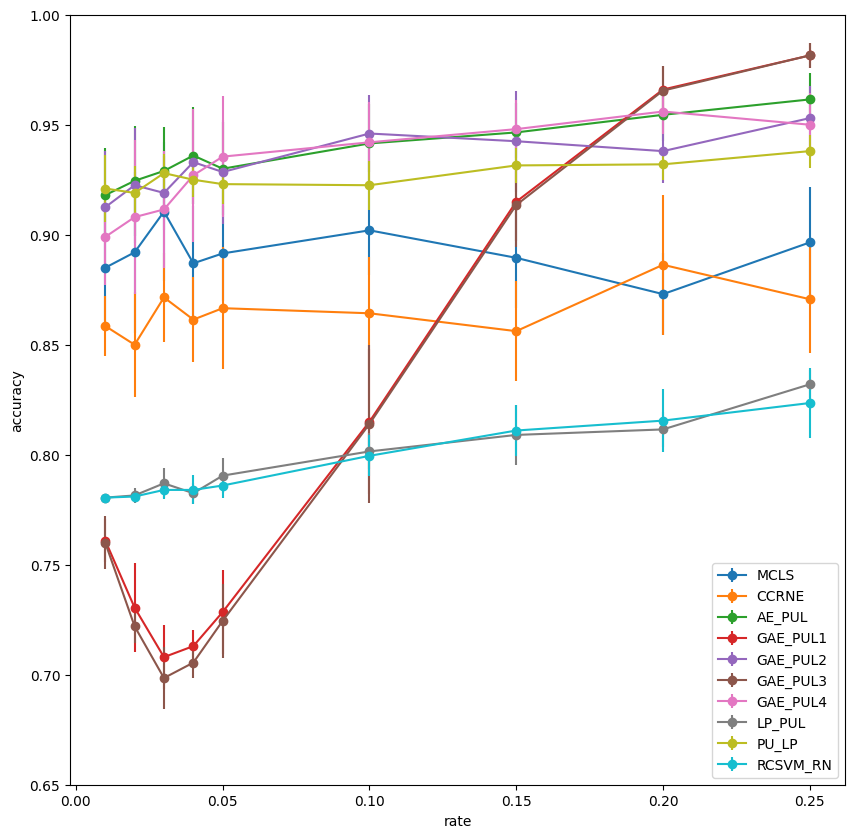

In [79]:
# criar um gráfico para cada um dos conjuntos de dados, cada algoritmo representa uma linha do gráfico, o desvio padrão deve aparecer.

# Suponha que você tenha um DataFrame com as colunas "coluna1" e "coluna2"

dataset_plot = 'cora'
# Extrair os dados das colunas
x = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['rate']
alg1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['df_acc']

e1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['acc_std']
e2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['acc_std']
e3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['acc_std']
e5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['acc_std']
e6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['acc_std']
e7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['acc_std']
e8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['acc_std']
e9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['acc_std']


plt.figure(figsize=(10, 10))
plt.ylim(0.65,1)
# Plotar as duas linhas usando o Matplotlib
plt.errorbar(x, alg1, e1, label='MCLS', fmt='-o')
plt.errorbar(x, alg2, e2, label='CCRNE', fmt='-o')
plt.errorbar(x, alg3, e3, label='AE_PUL', fmt='-o')
plt.errorbar(x, alg4, e4, label='GAE_PUL1', fmt='-o')
plt.errorbar(x, alg5, e5, label='GAE_PUL2', fmt='-o')
plt.errorbar(x, alg6, e6, label='GAE_PUL3', fmt='-o')
plt.errorbar(x, alg7, e7, label='GAE_PUL4', fmt='-o')
plt.errorbar(x, alg8, e8, label='LP_PUL', fmt='-o')
plt.errorbar(x, alg9, e9, label='PU_LP', fmt='-o')
plt.errorbar(x, alg10, e10, label='RCSVM_RN', fmt='-o')



# Adicionar rótulos aos eixos e uma legenda
plt.xlabel('rate')
plt.ylabel('accuracy')
plt.legend()

# Mostrar o gráfico
plt.show()



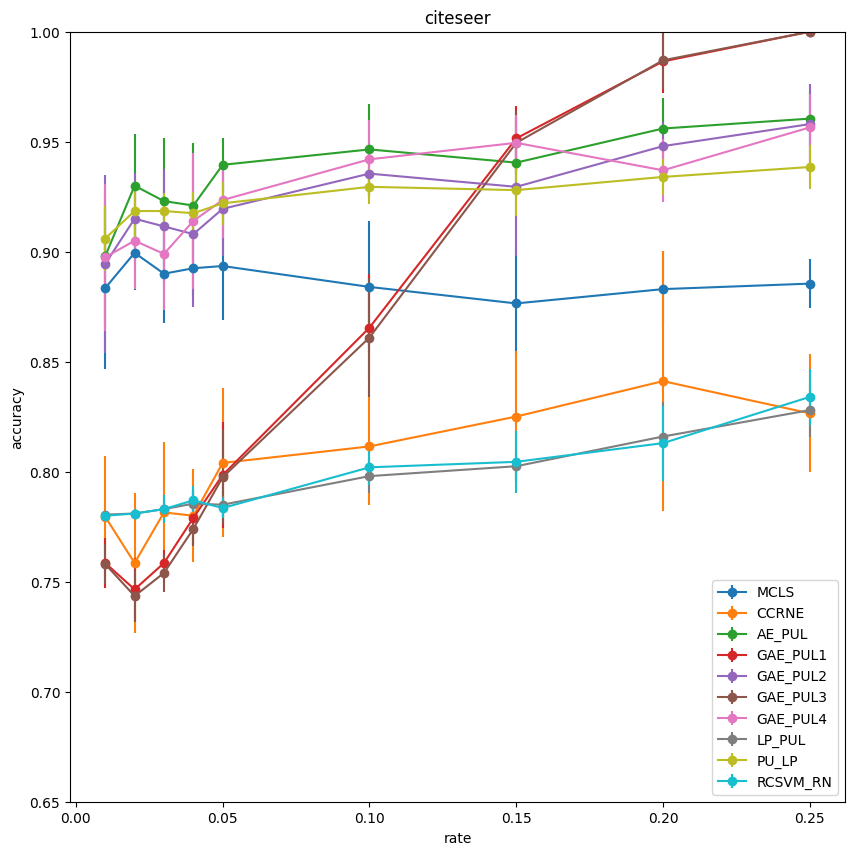

In [89]:
# criar um gráfico para cada um dos conjuntos de dados, cada algoritmo representa uma linha do gráfico, o desvio padrão deve aparecer.

# Suponha que você tenha um DataFrame com as colunas "coluna1" e "coluna2"

dataset_plot = 'citeseer'
# Extrair os dados das colunas
x = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['rate']
alg1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['df_acc']

e1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['acc_std']
e2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['acc_std']
e3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['acc_std']
e5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['acc_std']
e6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['acc_std']
e7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['acc_std']
e8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['acc_std']
e9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['acc_std']


plt.figure(figsize=(10, 10))
plt.ylim(0.65,1)
# Plotar as duas linhas usando o Matplotlib
plt.errorbar(x, alg1, e1, label='MCLS', fmt='-o')
plt.errorbar(x, alg2, e2, label='CCRNE', fmt='-o')
plt.errorbar(x, alg3, e3, label='AE_PUL', fmt='-o')
plt.errorbar(x, alg4, e4, label='GAE_PUL1', fmt='-o')
plt.errorbar(x, alg5, e5, label='GAE_PUL2', fmt='-o')
plt.errorbar(x, alg6, e6, label='GAE_PUL3', fmt='-o')
plt.errorbar(x, alg7, e7, label='GAE_PUL4', fmt='-o')
plt.errorbar(x, alg8, e8, label='LP_PUL', fmt='-o')
plt.errorbar(x, alg9, e9, label='PU_LP', fmt='-o')
plt.errorbar(x, alg10, e10, label='RCSVM_RN', fmt='-o')



# Adicionar rótulos aos eixos e uma legenda
plt.xlabel('rate')
plt.ylabel('accuracy')
plt.title(dataset_plot)
plt.legend()

# Mostrar o gráfico
plt.show()



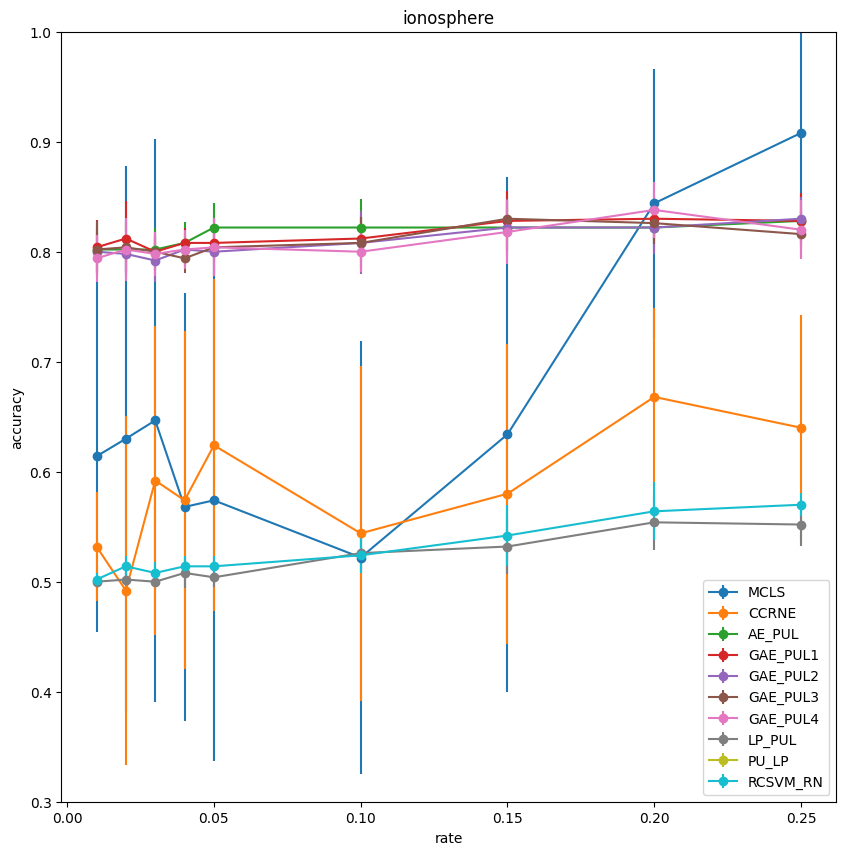

In [91]:
# criar um gráfico para cada um dos conjuntos de dados, cada algoritmo representa uma linha do gráfico, o desvio padrão deve aparecer.

# Suponha que você tenha um DataFrame com as colunas "coluna1" e "coluna2"

dataset_plot = 'ionosphere'
# Extrair os dados das colunas
x = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['rate']
alg1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['df_acc']

e1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['acc_std']
e2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['acc_std']
e3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['acc_std']
e5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['acc_std']
e6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['acc_std']
e7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['acc_std']
e8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['acc_std']
e9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['acc_std']


plt.figure(figsize=(10, 10))
plt.ylim(0.3,1)
# Plotar as duas linhas usando o Matplotlib
plt.errorbar(x, alg1, e1, label='MCLS', fmt='-o')
plt.errorbar(x, alg2, e2, label='CCRNE', fmt='-o')
plt.errorbar(x, alg3, e3, label='AE_PUL', fmt='-o')
plt.errorbar(x, alg4, e4, label='GAE_PUL1', fmt='-o')
plt.errorbar(x, alg5, e5, label='GAE_PUL2', fmt='-o')
plt.errorbar(x, alg6, e6, label='GAE_PUL3', fmt='-o')
plt.errorbar(x, alg7, e7, label='GAE_PUL4', fmt='-o')
plt.errorbar(x, alg8, e8, label='LP_PUL', fmt='-o')
plt.errorbar(x, alg9, e9, label='PU_LP', fmt='-o')
plt.errorbar(x, alg10, e10, label='RCSVM_RN', fmt='-o')



# Adicionar rótulos aos eixos e uma legenda
plt.xlabel('rate')
plt.ylabel('accuracy')
plt.title(dataset_plot)
plt.legend()

# Mostrar o gráfico
plt.show()



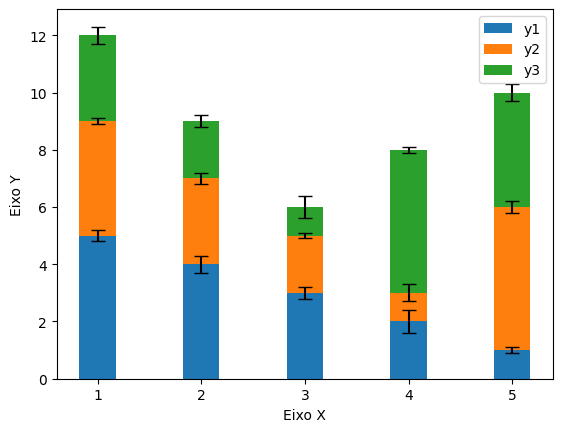

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponha que você tenha um DataFrame com as colunas "x", "y1", "y2" e "y3" (ou mais)
data = {'x': [1, 2, 3, 4, 5],
        'y1': [5, 4, 3, 2, 1],
        'y2': [4, 3, 2, 1, 5],
        'y3': [3, 2, 1, 5, 4]}

# Crie um DataFrame com os desvios padrão correspondentes para cada conjunto de dados Y
data_std = {'y1': [0.2, 0.3, 0.2, 0.4, 0.1],
            'y2': [0.1, 0.2, 0.1, 0.3, 0.2],
            'y3': [0.3, 0.2, 0.4, 0.1, 0.3]}

df = pd.DataFrame(data)
df_std = pd.DataFrame(data_std)

# Extrair os dados das colunas
x = df['x']
y_columns = ['y1', 'y2', 'y3']  # Inclua todos os nomes das colunas de Y que você deseja plotar
desvio_padrao = df_std[y_columns]

# Criar um gráfico de barras de erro empilhadas
fig, ax = plt.subplots()
width = 0.35  # Largura das barras

bottom = np.zeros(len(x))  # Inicializa o fundo das barras empilhadas

for y_col in y_columns:
    y = df[y_col]
    ax.bar(x, y, width, yerr=desvio_padrao[y_col], label=y_col, bottom=bottom, capsize=5)
    bottom += y  # Atualiza o fundo para a próxima série

# Adicionar rótulos aos eixos
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Adicionar uma legenda
plt.legend()

# Mostrar o gráfico
plt.show()


In [43]:
alg1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == 'cora')]['df_acc']
alg1

0     0.8850
5     0.8920
10    0.9105
15    0.8870
20    0.8915
25    0.9020
30    0.8895
35    0.8730
40    0.8965
Name: df_acc, dtype: float64

In [25]:
slice = df_dict['citeseer'][(df_dict['citeseer']['Algoritmo'] == 'MCLS') & (df_dict['citeseer']['Rate'] == 0.01)]
dict_aux = dict()
dict_aux['algoritmo'] = slice.iloc[0,0]
dict_aux['rate'] = rate
dict_aux['acc'] = slice['acc'].mean()
dict_aux['acc_std'] = slice['acc'].std()
dict_aux['f1'] = slice['f1'].mean()
dict_aux['f1_std'] = slice['f1'].std()

In [26]:
dict_aux

{'algoritmo': 'MCLS',
 'rate': 0.01,
 'acc': 0.8835,
 'acc_std': 0.03667045434981987,
 'f1': 0.9377829385815929,
 'f1_std': 0.020785017798367392}

In [ ]:
df_2 = df1[(df1['coluna1'] == 'valor1')]

In [34]:
# NN models

df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_NN.csv')
algorithms = ['AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3', 'GAE_PUL4']
AE_results_acc = list()
GAE1_results_acc = list()
GAE2_results_acc = list()
GAE3_results_acc = list()
GAE4_results_acc = list()

AE_results_f1 = list()
GAE1_results_f1 = list()
GAE2_results_f1 = list()
GAE3_results_f1 = list()
GAE4_results_f1 = list()

for rate in rates:
    for algorithm in algorithms:
        acc_df = df[(df['Rate'] == rate) & (df['Algoritmo'] == algorithm)]
        media_acc = acc_df['acc'].mean()
        
        if algorithm == 'AE_PUL':
            AE_results_acc.append(media_acc)
        if algorithm == 'GAE_PUL1':
            GAE1_results_acc.append(media_acc)
        if algorithm == 'GAE_PUL2':
            GAE2_results_acc.append(media_acc)
        if algorithm == 'GAE_PUL3':
            GAE3_results_acc.append(media_acc)
        if algorithm == 'GAE_PUL4':
            GAE4_results_acc.append(media_acc)

for rate in rates:
    for algorithm in algorithms:
        acc_df = df[(df['Rate'] == rate) & (df['Algoritmo'] == algorithm)]
        media_f1 = acc_df['f1'].mean()
        
        if algorithm == 'AE_PUL':
            AE_results_f1.append(media_f1)
        if algorithm == 'GAE_PUL1':
            GAE1_results_f1.append(media_f1)
        if algorithm == 'GAE_PUL2':
            GAE2_results_f1.append(media_f1)
        if algorithm == 'GAE_PUL3':
            GAE3_results_f1.append(media_f1)
        if algorithm == 'GAE_PUL4':
            GAE4_results_f1.append(media_f1)

In [42]:
# CCRNE
df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_CCRNE.csv')
CCRNE_results_acc = list()
CCRNE_results_f1 = list()

for rate in rates:
        acc_df = df[df['Rate'] == rate]
        media_f1 = acc_df['f1'].mean()
        media_acc = acc_df['acc'].mean()
        CCRNE_results_acc.append(media_acc)
        CCRNE_results_f1.append(media_f1)


In [44]:
#lppul
df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_LP_PUL.csv')
LP_PUL_results_acc = list()
LP_PUL_results_f1 = list()

for rate in rates:
        acc_df = df[df['Rate'] == rate]
        media_f1 = acc_df['f1'].mean()
        media_acc = acc_df['acc'].mean()
        LP_PUL_results_acc.append(media_acc)
        LP_PUL_results_f1.append(media_f1)

In [45]:
#mcls
df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_MCLS.csv')
MCLS_results_acc = list()
MCLS_results_f1 = list()

for rate in rates:
        acc_df = df[df['Rate'] == rate]
        media_f1 = acc_df['f1'].mean()
        media_acc = acc_df['acc'].mean()
        MCLS_results_acc.append(media_acc)
        MCLS_results_f1.append(media_f1)

In [46]:
df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_PU_LP.csv')
PU_LP_results_acc = list()
PU_LP_results_f1 = list()

for rate in rates:
        acc_df = df[df['Rate'] == rate]
        media_f1 = acc_df['f1'].mean()
        media_acc = acc_df['acc'].mean()
        PU_LP_results_acc.append(media_acc)
        PU_LP_results_f1.append(media_f1)

In [48]:
df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_RCSVM_RN.csv')
RCSVM_RN_results_acc = list()
RCSVM_RN_results_f1 = list()

for rate in rates:
        acc_df = df[df['Rate'] == rate]
        media_f1 = acc_df['f1'].mean()
        media_acc = acc_df['acc'].mean()
        RCSVM_RN_results_acc.append(media_acc)
        RCSVM_RN_results_f1.append(media_f1)

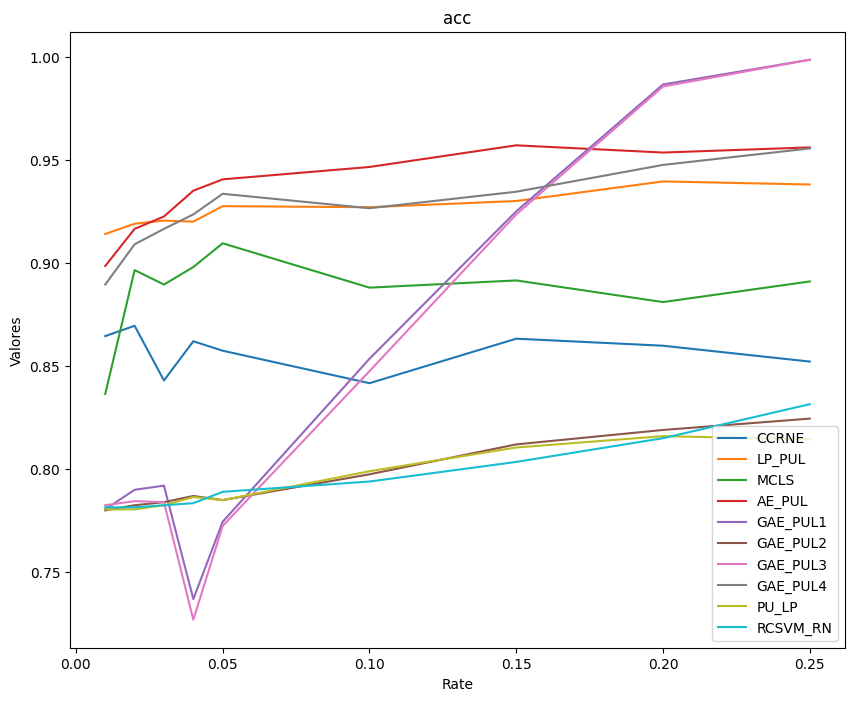

In [55]:
import matplotlib.pyplot as plt

acc_results = [CCRNE_results_acc, LP_PUL_results_acc, MCLS_results_acc,
               AE_results_acc, GAE1_results_acc, GAE2_results_acc, 
               GAE3_results_acc, GAE4_results_acc, PU_LP_results_acc,
               RCSVM_RN_results_acc]

# Sua lista de taxas (rate) com 10 elementos (substitua pelos seus próprios dados)

# Sua lista de rótulos (substitua pelos seus próprios rótulos)
algorithms = ['CCRNE', 'LP_PUL', 'MCLS', 'AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3',
              'GAE_PUL4', 'PU_LP', 'RCSVM_RN']

# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(10, 8))

# Iterar pelas listas de dados, rótulos e plotar cada uma como uma linha com rótulo
for i, lista in enumerate(acc_results):
    ax.plot(rates, lista, label=algorithms[i])

# Definir rótulos dos eixos e título do gráfico
ax.set_xlabel('Rate')
ax.set_ylabel('Valores')
ax.set_title('acc')

# Adicionar uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()


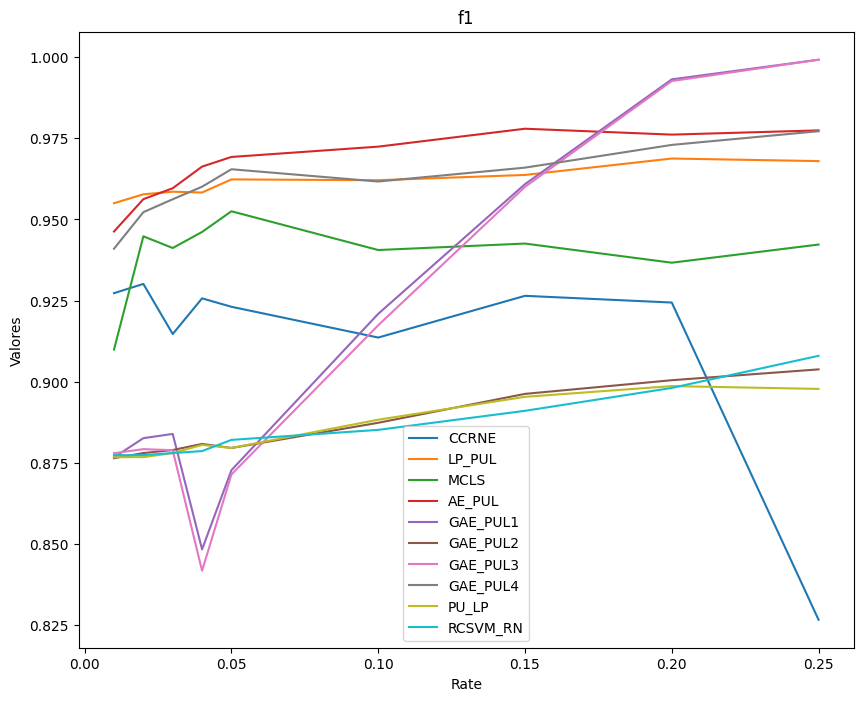

In [56]:
import matplotlib.pyplot as plt

acc_results = [CCRNE_results_f1, LP_PUL_results_f1, MCLS_results_f1,
               AE_results_f1, GAE1_results_f1, GAE2_results_f1, 
               GAE3_results_f1, GAE4_results_f1, PU_LP_results_f1,
               RCSVM_RN_results_f1]

# Sua lista de taxas (rate) com 10 elementos (substitua pelos seus próprios dados)

# Sua lista de rótulos (substitua pelos seus próprios rótulos)
algorithms = ['CCRNE', 'LP_PUL', 'MCLS', 'AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3',
              'GAE_PUL4', 'PU_LP', 'RCSVM_RN']

# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(10, 8))

# Iterar pelas listas de dados, rótulos e plotar cada uma como uma linha com rótulo
for i, lista in enumerate(acc_results):
    ax.plot(rates, lista, label=algorithms[i])

# Definir rótulos dos eixos e título do gráfico
ax.set_xlabel('Rate')
ax.set_ylabel('Valores')
ax.set_title('f1')

# Adicionar uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()
